# Philippine Energy Use

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data is available at [World Development Bank Data](https://data.worldbank.org). Now, let's load the data sets:

In [2]:
countries = pd.read_csv('00.01_countries.csv')
indicators = pd.read_csv('00.02_indicators.csv')

Southeast Asia is a subregion consisting of regions geographically south of China, northwest of Australia and east of India. It is composed of two geographic regions:

- Mainland Southeast Asia which is historically known as Indochina: Cambodia, Laos, Myanmar, Peninsular Malaysia, Thailand and Vietnam
- Maritime Southeast Asia also known historically as Nusantara, East Indies or the Malay Archipelago: Indonesia, Philippines, East Malaysia, Brunei, Singapore, Timor-Leste

It is the third most populous geographical region in the world after South Asia and East Asia. The region is culturally and ethnically diverse, with hundreds of languages spoken by different ethnic groups. Ten countries in the region are members of ASEAN, a regional organization established for economic, political, military, educational and cultural integration amongst its members.

In [3]:
mainland = ['Cambodia', 'Lao PDR', 'Myanmar', 'Malaysia', 'Thailand', 'Vietnam']
maritime = ['Indonesia', 'Philippines', 'Malaysia', 'Brunei', 'Singapore', 'Timor-Leste']

Let's subset the countries dataset to only pick SEA countries:

In [4]:
sea_countries = countries[countries.ShortName.isin(mainland + maritime)]

Knowing the corresponding rows for each country, we can now proceed to create a mask and filter only the SEA indicators:

In [5]:
sea_indicators = indicators[indicators.CountryCode.isin(sea_countries.CountryCode)]

The indicators we want are: 
- `EG.ELC.ACCS.RU.ZS` : Access to electricity, rural (% of population)
- `EG.ELC.ACCS.UR.ZS` : Access to electricity, urban (% of population)
- `EG.ELC.ACCS.ZS` : Access to electricity (% of population)

In [6]:
rural_indicator_code = 'EG.ELC.ACCS.RU.ZS'
urban_indicator_code = 'EG.ELC.ACCS.UR.ZS'
total_indicator_code = 'EG.ELC.ACCS.ZS'

Having said that, we can then proceed to slice the dataset for the respective categories

In [7]:
phl_indicators = sea_indicators[sea_indicators.CountryCode == 'PHL']

Moreover, we can subset the data to show only rows from the Philippines

In [8]:
ph_ec_rural = phl_indicators[phl_indicators.IndicatorCode == rural_indicator_code]
ph_ec_urban = phl_indicators[phl_indicators.IndicatorCode == urban_indicator_code]
ph_ec_total = phl_indicators[phl_indicators.IndicatorCode == total_indicator_code]

## What percentage of the population has access to electricty?

### Access to electricity over time

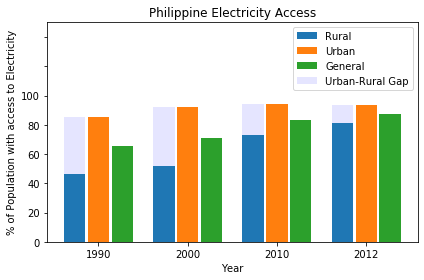

In [9]:
ind = np.arange(4) * 1.25
width = .30
    
fig, ax = plt.subplots()

rural = ph_ec_rural['Value'].values
urban = ph_ec_urban['Value'].values
total = ph_ec_total['Value'].values
urban_rural_gap = urban - rural

rects1 = ax.bar(ind - 1/3, rural, width, label='Rural')
rects2 = ax.bar(ind, urban, width, label='Urban')
rects3 = ax.bar(ind + 1/3, ph_ec_total['Value'].values, width, label='General')
rects3 = ax.bar(ind - 1/3, urban_rural_gap, width, rural, label='Urban-Rural Gap', alpha=.1, color='b')

ax.set_ylabel('% of Population with access to Electricity')
ax.set_xlabel('Year')
ax.set_title('Philippine Electricity Access')
ax.set_xticks(ind)
ax.set_xticklabels(('1990', '2000', '2010', '2012'))
ax.set_yticklabels(np.arange(0, 120, 20))
ax.set_ylim(0, 150)
ax.legend()

fig.tight_layout()
plt.show()

### Comparison to South-East Asian (SEA) countries

Since we already have the subset for sea, we can easily pivot using country code:

In [10]:
sea_ec_rural = sea_indicators[sea_indicators.IndicatorCode == rural_indicator_code]
sea_ec_urban = sea_indicators[sea_indicators.IndicatorCode == urban_indicator_code]
sea_ec_total = sea_indicators[sea_indicators.IndicatorCode == total_indicator_code]

sea_ec_total_pivot = sea_ec_total.pivot_table(index=['IndicatorName', 'IndicatorCode', 'Year'], columns=['CountryCode',], values='Value').reset_index()

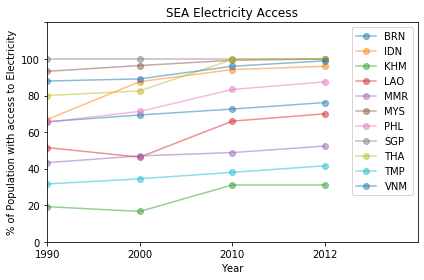

In [11]:
ind = np.arange(4)
width = 0.35

fig, ax = plt.subplots()

country_codes = ['BRN', 'IDN', 'KHM', 'LAO', 'MMR', 'MYS', 'PHL', 'SGP', 'THA', 'TMP', 'VNM']

for code in country_codes:
    ax.plot(ind, sea_ec_total_pivot[code].values, 'o-', label=code, alpha=0.5)

ax.set_ylabel('% of Population with access to Electricity')
ax.set_xlabel('Year')
ax.set_title('SEA Electricity Access')
ax.set_xticks(ind)
ax.set_xticklabels(('1990', '2000', '2010', '2012'))
ax.set_yticklabels(np.arange(0, 120, 20))
ax.set_ylim(0, 120)
ax.set_xlim(0, 4)
ax.legend()

fig.tight_layout()
plt.show()

## What constitutes my country's energy mix?

For the energy mix, the relevant indicators we want are: 
- `EG.ELC.FOSL.ZS` : Electricity production from oil, gas and coal sources (% of total)
- `EG.ELC.HYRO.ZS` : Electricity production from hydroelectric sources (% of total)
- `EG.ELC.NUCL.ZS` : Electricity production from nuclear sources (% of total)
- `EG.ELC.RNWX.ZS` : Electricity production from renewable sources, excluding hydroelectric (% of total)

In [12]:
fossil_fuel_indicator_code = 'EG.ELC.FOSL.ZS'
hydroelectric_indicator_code = 'EG.ELC.HYRO.ZS'
nuclear_indicator_code = 'EG.ELC.NUCL.ZS'
renewable_indicator_code = 'EG.ELC.RNWX.ZS'

In [13]:
em_indicator_map = {'EG.ELC.FOSL.ZS': 'FossilFuel', 'EG.ELC.HYRO.ZS': 'Hydroelectric', 'EG.ELC.NUCL.ZS': 'Nuclear', 'EG.ELC.RNWX.ZS': 'Renewable'}

Rough breakdown of our energy mix is:

In [14]:
phl_energy_mix = (
phl_indicators[phl_indicators.IndicatorCode.isin([fossil_fuel_indicator_code, hydroelectric_indicator_code, nuclear_indicator_code, renewable_indicator_code])]
    .pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorCode', values='Value')
    .reset_index()
    .rename(columns=em_indicator_map)
)
phl_energy_mix.drop(columns='Year').agg('mean')

IndicatorCode
FossilFuel       66.879385
Hydroelectric    17.261775
Nuclear           0.000000
Renewable        15.857249
dtype: float64

Fossil fuel is the main source of energy for the country and only adopted mainstream hydroelectricity in 1973. Although, early hydroelectric plants like the Agus 6 Hydroelectric Power Plant in Iligan City and the Agusan 2 Hydroelectric Power Plant in Bukidnon has been commisioned as early as 1953. As for renewable energy, BacMan Geothermal Production Field in Sorsogon started operation in 1979 which accounted for 3.8% of the total mix at that time. Our nuclear efforts never really took traction. Bataan Nuclear Power Plant was completed but wasn't fueled.

### Energy Mix in the Philippines

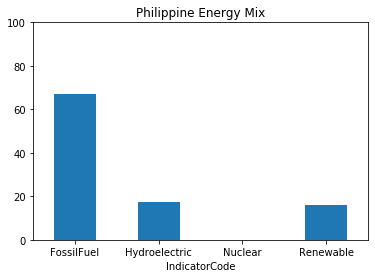

In [15]:
phl_energy_mix.drop(columns='Year').agg('mean').plot.bar(title='Philippine Energy Mix', ylim=(0, 100), rot=0)

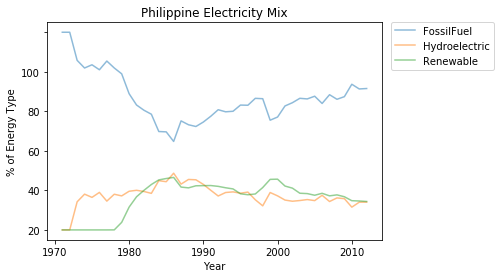

In [16]:
fig, ax = plt.subplots()

energy_types = ['FossilFuel', 'Hydroelectric', 'Renewable']

for energy_type in energy_types:
    ax.plot(phl_energy_mix.Year, phl_energy_mix[energy_type], label=energy_type, alpha=0.5)

ax.set_ylabel('% of Energy Type')
ax.set_xlabel('Year')
ax.set_title('Philippine Electricity Mix')
ax.set_yticklabels(np.arange(0, 120, 20))
ax.legend(bbox_to_anchor=(1.35, 1.025))

plt.show()

### Comparison to South-East Asian (SEA) countries

#### Fossil-Fuel use

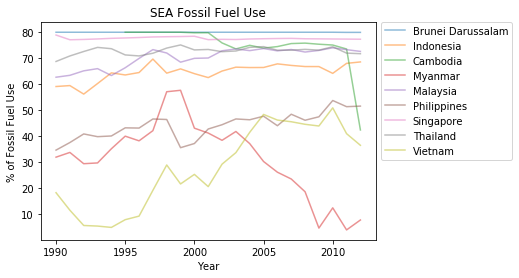

In [17]:
fig, ax = plt.subplots()

for key, data in sea_indicators[sea_indicators.IndicatorCode == fossil_fuel_indicator_code].groupby(['CountryCode', 'CountryName']):   
    data_fossil_fuel = data[data.Year.isin(range(1990, 2013))]
    ax.plot(data_fossil_fuel.Year, data_fossil_fuel.Value, label=key[1], alpha=0.5)

ax.set_ylabel('% of Fossil Fuel Use')
ax.set_xlabel('Year')
ax.set_title('SEA Fossil Fuel Use')
ax.set_yticklabels(np.arange(0, 120, 10))
ax.legend(bbox_to_anchor=(1, 1.025))

plt.show()

#### Renewable Energy Adoption

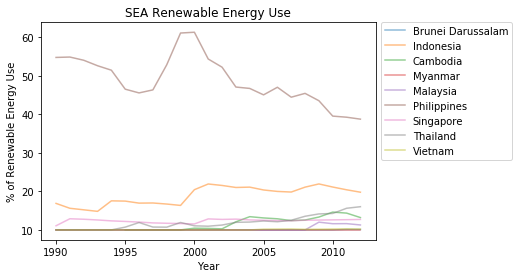

In [18]:
fig, ax = plt.subplots()

for key, data in sea_indicators[sea_indicators.IndicatorCode == renewable_indicator_code].groupby(['CountryCode', 'CountryName']):   
    data_fossil_fuel = data[data.Year.isin(range(1990, 2013))]
    ax.plot(data_fossil_fuel.Year, data_fossil_fuel.Value, label=key[1], alpha=0.5)

ax.set_ylabel('% of Renewable Energy Use')
ax.set_xlabel('Year')
ax.set_title('SEA Renewable Energy Use')
ax.set_yticklabels(np.arange(0, 120, 10))
ax.legend(bbox_to_anchor=(1, 1.025))

plt.show()

## How are we consuming our energy?

In [19]:
energy_consumption = 'EG.USE.ELEC.KH.PC'
phl_energy_consumption =phl_indicators[phl_indicators.IndicatorCode == energy_consumption]
phl_energy_consumption.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
413201,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1971,235.759872
482539,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1972,260.458690
552078,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1973,321.887296
621941,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1974,309.390104
693836,Philippines,PHL,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,1975,314.468082


### Electric Power Consumption over time

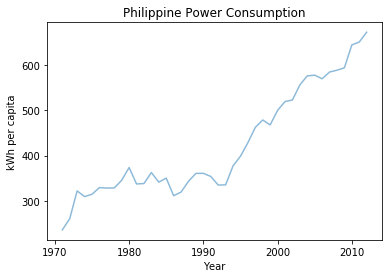

In [20]:
fig, ax = plt.subplots()
ax.plot(phl_energy_consumption.Year, phl_energy_consumption.Value, label='kWh per capita', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('kWh per capita')
ax.set_title('Philippine Power Consumption')
plt.show()

### Consumption footprint

For the energy mix, the relevant indicators we want are: 
- `EN.ATM.CO2E.KT` : CO2 emissions (kt)
- `EN.ATM.CO2E.GF.KT` : CO2 emissions from gaseous fuel consumption (kt)
- `EN.ATM.CO2E.LF.KT` : CO2 emissions from liquid fuel consumption (kt)
- `EN.ATM.CO2E.SF.K`  : CO2 emissions from solid fuel consumption (kt)

In [21]:
carbon_emissions_indicator_code = 'EN.ATM.CO2E.KT'
gas_carbon_emissions_indicator_code = 'EN.ATM.CO2E.GF.KT'
liquid_carbon_emissions_indicator_code = 'EN.ATM.CO2E.LF.KT'
solid_carbon_emissions_indicator_code = 'EN.ATM.CO2E.SF.KT'

In [22]:
carbon_emissions_indicator_codes = [gas_carbon_emissions_indicator_code, liquid_carbon_emissions_indicator_code, solid_carbon_emissions_indicator_code]
phl_carbon_emissions = phl_indicators[phl_indicators.IndicatorCode.isin(carbon_emissions_indicator_codes)]

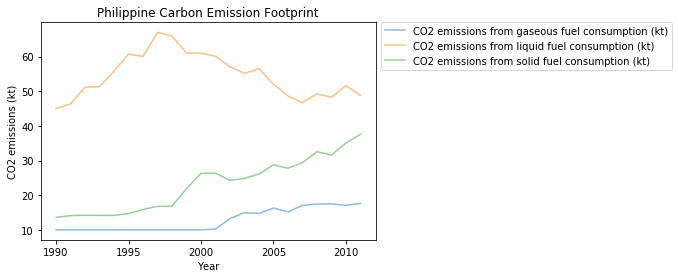

In [23]:
fig, ax = plt.subplots()

for key, data in phl_carbon_emissions.groupby(['IndicatorCode', 'IndicatorName']):   
    carbon_emissions = data[data.Year.isin(range(1990, 2013))]
    ax.plot(carbon_emissions.Year, carbon_emissions.Value, label=key[1], alpha=0.5)

ax.set_ylabel('CO2 emissions (kt)')
ax.set_xlabel('Year')
ax.set_title('Philippine Carbon Emission Footprint')
ax.set_yticklabels(np.arange(0, 120, 10))
ax.legend(bbox_to_anchor=(1, 1.025))

plt.show()

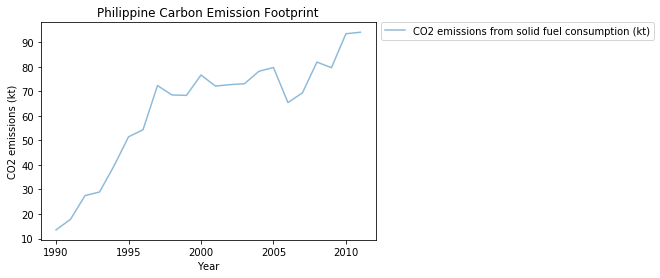

In [24]:
fig, ax = plt.subplots()
    
ph_total_carbon_emissions = phl_indicators[(phl_indicators.IndicatorCode == carbon_emissions_indicator_code) & (phl_indicators.Year.isin(range(1990, 2013)))]
ax.plot(ph_total_carbon_emissions.Year, ph_total_carbon_emissions.Value, label=key[1], alpha=0.5)

ax.set_ylabel('CO2 emissions (kt)')
ax.set_xlabel('Year')
ax.set_title('Philippine Carbon Emission Footprint')
ax.set_yticklabels(np.arange(0, 120, 10))
ax.legend(bbox_to_anchor=(1, 1.025))

plt.show()